# HvPlot/Bokeh

In this practical we are going to work with HvPlot/bokeh. HvPlot offers an intuitive interface to visualize your data interactively. The plots get created in bokeh by default, a library for interactive data visualization.
I also provide static versions using seaborn of the plots for comparison 





<img src="images/hvplot_logo.svg" width="800">




In [1]:
# make noteobok wider
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import pandas as pd # data transformation
from datetime import datetime # handle dates
import numpy as np # math

# viz
import pylab as plt # base library
import seaborn as sns # tidy viz
from descartes import PolygonPatch # maps
import geopandas as gp # maps


## This is for seaborn
# change the default colors and behavior of the plot
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "axes.spines.bottom": False,
                 "lines.linewidth": 2, "grid.color": "lightgray", "legend.frameon": False, "xtick.labelcolor": "#484848", 
                 "ytick.labelcolor": "#484848", "xtick.color": "#484848", "ytick.color": "#484848","text.color": "#484848", 
                 "axes.labelcolor": "#484848", "axes.titlecolor":"#484848", "figure.figsize": [5,3],
                 "axes.titlelocation":"left","xaxis.labellocation":"left","yaxis.labellocation":"bottom"}

palette = ["#3d348b","#e6af2e","#191716","#a65628"] #use your favourite colours

sns.set_theme(context='paper', style='white', palette=palette, font_scale=1.3, color_codes=True, rc=custom_params)

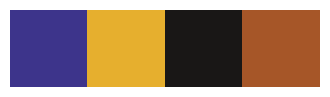

In [2]:
sns.palplot(palette)

In [3]:
import hvplot.pandas # make plot from pandas 
import hvplot
import panel as pn
pn.extension() #work on notebooks

## Read the data

Covid data in Europe

In [4]:
#pandas doesn't detect the format correctly, doing it manually
parser = lambda date: datetime.strptime(date, '%d/%m/%Y')

#read data
#path = "https://github.com/jgarciab/workshop_data_viz/raw/refs/heads/main/advanced_2024/data/data-1.xlsx"
path = "data/data-1.xlsx"
df = pd.read_excel(path, parse_dates=["dateRep"], date_parser=parser)
df["cases_capita"] = 1E6*df["cases"]/df["popData2020"]
df["deaths_capita"] = 1E6*df["deaths"]/df["popData2020"]

df = df.loc[df["dateRep"]>"2020-03-01"]

#resample per week
df = df.groupby(["countriesAndTerritories","geoId"]).resample("M", on='dateRep').mean(numeric_only=True).reset_index()

#print head
df.head()

/var/folders/hx/nz98f65j615c4ygz7xt694700000gp/T/ipykernel_53860/4201735058.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_excel("data/data-1.xlsx", parse_dates=["dateRep"], date_parser=parser)
/var/folders/hx/nz98f65j615c4ygz7xt694700000gp/T/ipykernel_53860/4201735058.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.groupby(["countriesAndTerritories","geoId"]).resample("M", on='dateRep').mean(numeric_only=True).reset_index()


,countriesAndTerritories,geoId,dateRep,year,month,day,cases,deaths,popData2020,cases_capita,deaths_capita
0,Austria,AT,2020-03-31,2020.0,3.0,16.5,349.200000,5.766667,8901064.0,39.231265,0.647863
1,Austria,AT,2020-04-30,2020.0,4.0,15.5,167.700000,15.433333,8901064.0,18.840444,1.733875
2,Austria,AT,2020-05-31,2020.0,5.0,16.0,36.451613,1.935484,8901064.0,4.095197,0.217444
3,Austria,AT,2020-06-30,2020.0,6.0,15.5,37.766667,1.266667,8901064.0,4.242938,0.142305
4,Austria,AT,2020-07-31,2020.0,7.0,16.0,109.903226,0.451613,8901064.0,12.347201,0.050737


## First plot: Scatter cases

Plot the number of cases (per 1M people) vs number of deaths (per 1M). 

For clarity let's use only four countries: NL, ES, FR, BE

In [5]:
df_subset = df.loc[df["geoId"].isin({"NL", "ES", "FR", "BE"})]

### Static example

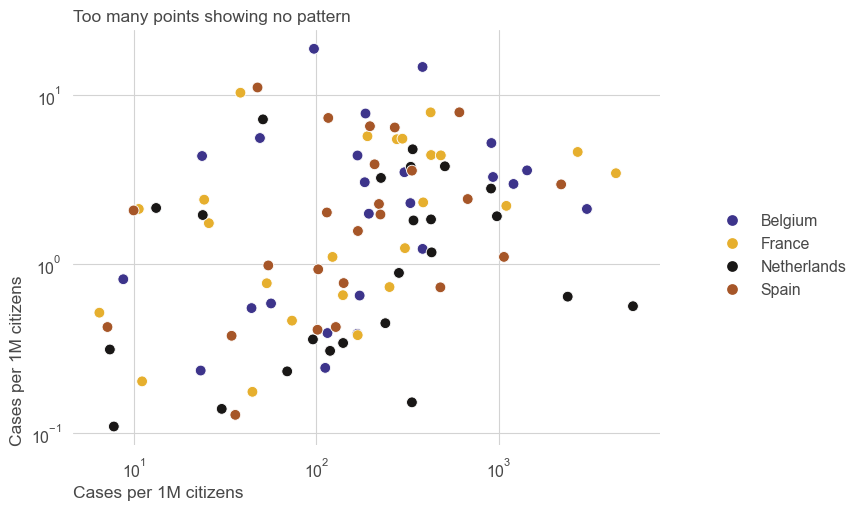

In [6]:
g = sns.relplot(x="cases_capita", # x channel
                y="deaths_capita",  # y channel
                hue="countriesAndTerritories",  # color
                kind="scatter",  # type of plot (scatter / line)
                data=df_subset, # data
                aspect=1.4,
                s=60) # make it a bit wider 

#log scale
plt.xscale("log")
plt.yscale("log")

#add gridlines, remove axes lines
plt.grid()
sns.despine(left=True, bottom=True)

#labels
plt.xlabel("Cases per 1M citizens")
plt.ylabel("Cases per 1M citizens")

#title
plt.title("Too many points showing no pattern")
#remove legend title
g.legend.set_title("")

plt.show()

### Dynamic example

In [27]:
# Use hvplot to create a scatter plot
plot = df_subset.hvplot.scatter(
    x='cases_capita', 
    y='deaths_capita', 
    by='countriesAndTerritories',
    logx=True, 
    logy=True,
    alpha=0.8,
    size=50,
    title="Too many points for a plot",
    xlabel='Cases per capita',
    ylabel='Deaths per capita',
    color=palette,
    legend='top_left',
    width=600,  # You can adjust the width and height as required
    height=400,
    hover_cols=["countriesAndTerritories", "dateRep", "cases_capita", "deaths_capita"],
)

plot.opts(
    toolbar='right',
    show_grid=True,
    # tools=[HoverTool(tooltips=[
    #     ('Country', '@countriesAndTerritories'),
    #     ('Date', '@dateRep{%F}'),
    #     ('Cases', '@cases_capita{0.2f}'),
    #     ('Deaths', '@deaths_capita{0.2f}')
    # ])
)


:NdOverlay   [countriesAndTerritories]
   :Scatter   [cases_capita]   (deaths_capita,countriesAndTerritories,dateRep)

In [28]:
# Use hvplot to create a scatter plot
plot = df_subset.hvplot.scatter(
    x='cases_capita', 
    y='deaths_capita', 
    groupby='countriesAndTerritories',
    logx=True, 
    logy=True,
    alpha=0.8,
    size=50,
    title="Too many points for a plot",
    xlabel='Cases per capita',
    ylabel='Deaths per capita',
    color=palette,
    legend='top_left',
    width=600,  # You can adjust the width and height as required
    height=400,
    hover_cols=["countriesAndTerritories", "dateRep", "cases_capita", "deaths_capita"],
)

plot.opts(
    toolbar='right',
    show_grid=True,
    # tools=[HoverTool(tooltips=[
    #     ('Country', '@countriesAndTerritories'),
    #     ('Date', '@dateRep{%F}'),
    #     ('Cases', '@cases_capita{0.2f}'),
    #     ('Deaths', '@deaths_capita{0.2f}')
    # ])
)


:DynamicMap   [countriesAndTerritories]
   :Scatter   [cases_capita]   (deaths_capita,countriesAndTerritories,dateRep)

## Second  plot: Line

Basic plot just changes scatter with line and x_axis_type

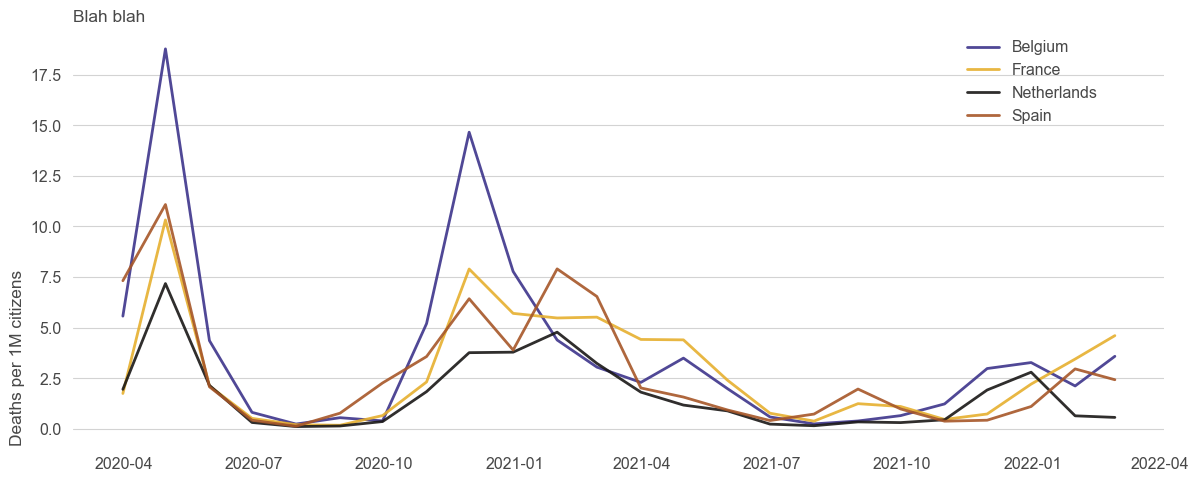

In [29]:
g = sns.relplot(x="dateRep", # x channel
            y="deaths_capita",  # y channel
            hue="countriesAndTerritories",  # color
            kind="line",  # type of plot (scatter / line)
            data=df_subset, # data
            aspect=2.4,
            alpha=0.9) # make it a bit wider 

#add gridlines, remove axes lines
plt.gca().grid(axis="y")
sns.despine(left=True, bottom=True)

#labels
plt.xlabel("")
plt.ylabel("Deaths per 1M citizens")

#title
plt.title("Blah blah")
#remove legend title
g.legend.set_title("")


g.legend.set_bbox_to_anchor([0.8, 0.8])  # coordinates of lower left of bounding box
# g.legend._loc = 3  # if required you can set the loc
plt.show()

In [30]:
import hvplot.pandas

# Use hvplot to create the line plot
plot = df_subset.hvplot.line(
    x='dateRep',
    y='deaths_capita',
    by='countriesAndTerritories',
    width=900,
    height=450,
    title="Belgium was especially affected by covid",
    xlabel='',
    ylabel='Deaths per capita',
    color=palette,
    legend='top_left',
    hover_cols=[
        "countriesAndTerritories",
        "dateRep",
        "cases_capita",
        "deaths_capita"
    ]
).opts(
    toolbar='below',
    show_grid=True,
    gridstyle=dict(xgrid_line_color=None)
)


# Display the plot
plot


:NdOverlay   [countriesAndTerritories]
   :Curve   [dateRep]   (deaths_capita,countriesAndTerritories,cases_capita)

In [31]:

# Assuming df_subset is a DataFrame that has been loaded

# Create a plot using hvPlot
lines = df_subset.hvplot.line(
    x='dateRep',
    y='deaths_capita',
    by='countriesAndTerritories',
    width=900,
    height=450,
    title="Belgium was especially affected by covid",
    legend='top_left',
    line_alpha=0.6,
    line_width=3,
    ylabel='Deaths per capita',
    color=palette,
    xlabel=""
    
).opts(show_grid=True, gridstyle=dict(xgrid_line_color=None))

points = df_subset.hvplot.scatter(
    x='dateRep',
    y='deaths_capita',
    by='countriesAndTerritories',
    marker='o',
    color=palette,
    
)

combined = lines * points

combined

:Overlay
   .NdOverlay.I  :NdOverlay   [countriesAndTerritories]
      :Curve   [dateRep]   (deaths_capita)
   .NdOverlay.II :NdOverlay   [countriesAndTerritories]
      :Scatter   [dateRep]   (deaths_capita)

## Plot 3: cloropleth

In [32]:
df_av = df.groupby("geoId").mean(numeric_only=True)

In [36]:
# Plot EU
#path = "https://github.com/jgarciab/workshop_data_viz/raw/refs/heads/main/advanced_2024/data/CNTR_RG_60M_2020_4326.shp.zip"
path = "data/CNTR_RG_60M_2020_4326.shp.zip"
df_g = gp.read_file(path)#, SHAPE_RESTORE_SHX)
df_g = df_g.loc[df_g["EU_STAT"]=="T"]
df_g = pd.merge(df_g, df_av, left_on="FID",right_on="geoId", how="left")

# Remove islands
def largest_area_only(geoms):
    if geoms.geom_type != "MultiPolygon":
        return geoms
    else:
        max_area = -1
        for geom in geoms.geoms:

            if geom.area > max_area:
                max_area = geom.area
                ret_area = geom
        return ret_area

df_g["geometry"] = df_g["geometry"].apply(largest_area_only)

# equirectangular
df_g = df_g.to_crs('EPSG:4326')


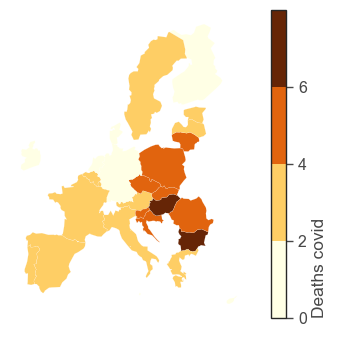

In [37]:
#Make the plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.set_aspect("equal") #this one is important
g = df_g.plot(linewidth=0.1,cmap=plt.get_cmap("YlOrBr",4), column="deaths_capita", ax=ax, legend=True, 
              vmin=0, vmax=8, legend_kwds={'label': 'Deaths covid', 'ticks': np.arange(0, 8, 2)})
plt.axis('off')
plt.show()

In [38]:
# Create choropleth using hvPlot
choropleth = df_g.hvplot.polygons(
    geo=True, 
    cmap=plt.get_cmap("YlOrBr", 4),
    c='deaths_capita',
    hover_cols=["NAME_ENGL", "deaths_capita"],
    alpha=0.7,
    width=450,
    height=550,
    colorbar=True,
    title="COVID-19 deaths per capita",
    line_color="white", 
    line_width=0.5,
    clim=(0, 8),  # color limits for the colorbar
    xaxis=None,
    yaxis=None,
    tiles=True
)

choropleth


:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (deaths_capita,NAME_ENGL)

In [50]:
## The same as before but using bokeh directly
from bokeh.models import GeoJSONDataSource, HoverTool, ColorBar
from bokeh.transform import linear_cmap
from bokeh.palettes import brewer
from bokeh.plotting import figure

# Convert the merged data into GeoJSONDataSource for Bokeh
geo_source = GeoJSONDataSource(geojson=df_g.to_json())

# Create a color mapper for the 'deaths_capita' field
mapper = linear_cmap(
    field_name='deaths_capita',
    palette=brewer['YlOrBr'][4][::-1],  # Reverse color palette for better contrast
    low=0, 
    high=8,
    nan_color="lightgray"  # Color for missing values
)


# Create a Bokeh figure for the map visualization
p = figure(
    title="Deaths per Capita Across Countries",
    tools='pan, wheel_zoom, reset, save',
    width=800, height=600,  # Adjust size to fit the map better
    toolbar_location='right'
)

# Plot the patches representing the countries (using xs and ys for coordinates)
p.patches(
    'xs', 'ys',
    source=geo_source,
    fill_color=mapper,
    line_color='black',
    line_width=0.5,
    fill_alpha=1.0
)



# Configure hover tool to display additional information
hover = HoverTool()
hover.tooltips = [
    ("Country", "@NAME_ENG"),  # Assuming the GeoDataFrame has a 'NAME_ENG' field for country names
    ("Deaths per capita", "@deaths_capita")
]
p.add_tools(hover)

# Add a color bar for the deaths per capita visualization
color_bar = ColorBar(
    color_mapper=mapper['transform'], 
    width=8, 
    location=(0, 0)
)
p.add_layout(color_bar, 'right')


# Hide the axes
p.xaxis.visible = False
p.yaxis.visible = False
p.xgrid.visible = False
p.ygrid.visible = False
pn.panel(p)

Bokeh(figure)

## Part 4: Linking plots


https://docs.bokeh.org/en/latest/docs/user_guide/interaction/linking.html

In [51]:
plot + choropleth

:Layout
   .NdOverlay.I :NdOverlay   [countriesAndTerritories]
      :Curve   [dateRep]   (deaths_capita,countriesAndTerritories,cases_capita)
   .Overlay.I   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .Polygons.I :Polygons   [Longitude,Latitude]   (deaths_capita,NAME_ENGL)

## Part 5: Exporting visualization


In [52]:


hvplot.save(choropleth, 'apps/simple_choropleth.html')

# If you want the plot to show in a computer with no internet do the following
# from bokeh.resources import INLINE
# hvplot.save(plot, 'test.html', resources=INLINE)



## Part 6: Other cool things!



In [53]:
df

,countriesAndTerritories,geoId,dateRep,year,month,day,cases,deaths,popData2020,cases_capita,deaths_capita
0,Austria,AT,2020-03-31,2020.0,3.0,16.5,349.200000,5.766667,8901064.0,39.231265,0.647863
1,Austria,AT,2020-04-30,2020.0,4.0,15.5,167.700000,15.433333,8901064.0,18.840444,1.733875
2,Austria,AT,2020-05-31,2020.0,5.0,16.0,36.451613,1.935484,8901064.0,4.095197,0.217444
3,Austria,AT,2020-06-30,2020.0,6.0,15.5,37.766667,1.266667,8901064.0,4.242938,0.142305
4,Austria,AT,2020-07-31,2020.0,7.0,16.0,109.903226,0.451613,8901064.0,12.347201,0.050737
...,...,...,...,...,...,...,...,...,...,...,...
715,Sweden,SE,2021-10-31,2021.0,10.0,16.0,645.516129,4.967742,10327589.0,62.504049,0.481017
716,Sweden,SE,2021-11-30,2021.0,11.0,15.5,1129.700000,4.000000,10327589.0,109.386615,0.387312
717,Sweden,SE,2021-12-31,2021.0,12.0,16.0,4167.612903,6.258065,10327589.0,403.541708,0.605956
718,Sweden,SE,2022-01-31,2022.0,1.0,16.0,27329.032258,27.838710,10327589.0,2646.216097,2.695567


In [54]:
# Run this code (.show() will create a server and open the app in a new tab)
hvplot.explorer(df).show()


Launching server at http://localhost:53415


In [55]:
# Lag plots
d = pd.pivot_table(df_subset, values="deaths_capita",columns="geoId", index="dateRep")

hvplot.lag_plot(d, lag=7)

:Scatter   [y(t)]   (y(t + 7),variable)